In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

896200 ['9883875680731069526', '8099720176579973339', '6032607724483607849']
Max digit len: 19
Digits per position: {0: [0, 0, 804, 2554, 4312, 6038, 7976, 9501, 11337, 12978], 1: [4997, 9102, 5271, 5349, 5524, 5520, 5667, 5957, 6039, 6112], 2: [6211, 13987, 6923, 8560, 10118, 11569, 12987, 14594, 16242, 17556], 3: [11867, 22869, 12794, 14336, 15605, 17100, 18652, 19946, 21260, 22892], 4: [18074, 31557, 18823, 20026, 21410, 22565, 23857, 24997, 26636, 27596], 5: [23913, 40059, 24461, 25855, 26905, 28137, 29268, 30595, 31510, 32511], 6: [30089, 48227, 30535, 31549, 32601, 33590, 34753, 35506, 36717, 37518], 7: [36040, 55751, 36468, 37701, 38276, 39032, 40165, 40673, 41608, 42769], 8: [41912, 63687, 42178, 42852, 43848, 44836, 45494, 46118, 46920, 47697], 9: [47616, 71188, 48201, 49236, 49250, 50119, 50999, 51439, 51938, 52823], 10: [53741, 78376, 53677, 54892, 54815, 55921, 56375, 56964, 56965, 58022], 11: [59905, 85621, 59664, 59857, 60293, 61437, 61718, 62298, 62667, 63066], 12: [6533

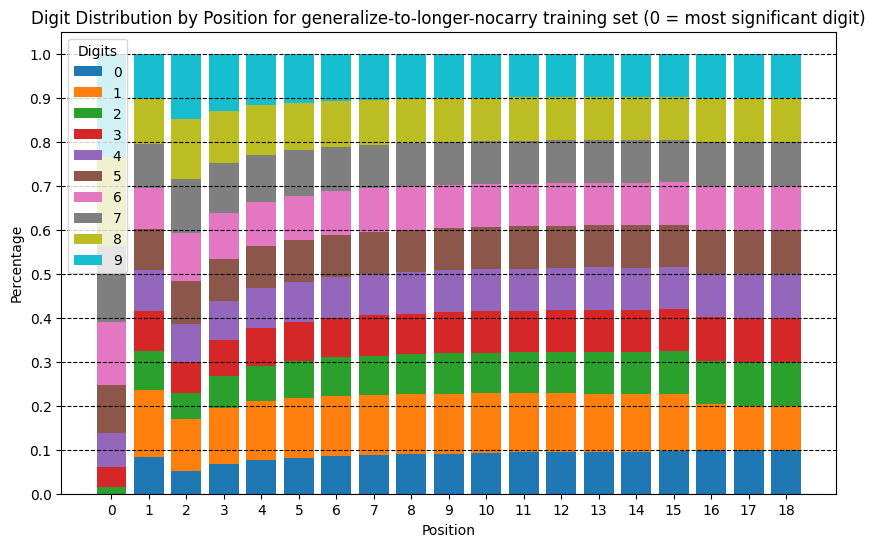

In [2]:
# check distribution of digits in answer generalize-to-longer
# datapath = "../data/addition/exp_13/train_add_1-19_except18_1M.txt"
datapath = (
    "../data/addition/generalize_to_longer_20_nocarry/train_add_1-19_except18_1M.txt"
)

with open(datapath, "r") as f:
    answers = list(map(lambda l: l.split("=")[1].strip(), f.readlines()))


print(len(answers), answers[-3:])

# take digits by position
max_digit_len = max(map(len, answers))
print("Max digit len:", max_digit_len)

digits_per_pos = {i: [0] * 10 for i in range(max_digit_len)}

for ans in answers:
    for i, digit in enumerate(ans[::-1]):
        digits_per_pos[max_digit_len - i - 1][int(digit)] += 1

print("Digits per position:", digits_per_pos)

# normalize counts
for pos, counts in digits_per_pos.items():
    total = sum(counts)
    digits_per_pos[pos] = [c / total for c in counts]

print("Digits per position (normalized):", digits_per_pos)

positions = np.arange(max_digit_len)  # Positions for each stack
bottom = np.zeros(max_digit_len)  # Starting point for the first digit

plt.figure(figsize=(10, 6))

# Plot each digit's percentage one by one
for digit in range(10):
    values = [digits_per_pos[pos][digit] for pos in range(max_digit_len)]
    plt.bar(positions, values, bottom=bottom, label=digit)
    bottom += values  # Update the bottom for the next stack

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title(
    "Digit Distribution by Position for generalize-to-longer-nocarry training set (0 = most significant digit)"
)
plt.xticks(positions)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis="y", linestyle="--", which="both", color="black")
plt.legend(title="Digits")
plt.savefig("../plots/ans_digit_distribution_generalize_to_longer_train.png")
plt.show()